In [1]:
## Import the Libraries

In [2]:
import os
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

from ipywidgets import widgets

2026-02-16 13:56:06.546042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771250166.731330      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771250166.785580      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771250167.230643      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771250167.230681      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771250167.230683      24 computation_placer.cc:177] computation placer alr

In [3]:
TRAIN_DIR = "/kaggle/input/datasets/lordtesla77/horse-or-human/Files/horse-or-human"

print(f"files in the current directory : {os.listdir()}")

print(f"\n subdirectories within '{TRAIN_DIR}' dir: {os.listdir(TRAIN_DIR)}")

files in the current directory : ['__notebook__.ipynb']

 subdirectories within '/kaggle/input/datasets/lordtesla77/horse-or-human/Files/horse-or-human' dir: ['humans', 'horses']


In [4]:
train_horse_dir = os.path.join(TRAIN_DIR,'horses')
train_human_dir = os.path.join(TRAIN_DIR,'humans')

#Check the fileNames

train_horse_names = os.listdir(train_horse_dir)
print(f"5 files in horses subdir: {train_horse_names[:5]}")
train_human_names = os.listdir(train_human_dir)
print(f"5 files in human subdir:{train_human_names[:5]}")

5 files in horses subdir: ['horse46-4.png', 'horse40-1.png', 'horse06-2.png', 'horse07-7.png', 'horse48-3.png']
5 files in human subdir:['human06-23.png', 'human16-08.png', 'human14-28.png', 'human16-13.png', 'human12-30.png']


In [5]:
print(f"total training horse images: {len(os.listdir(train_horse_dir))}")
print(f"total training human images: {len(os.listdir(train_human_dir))}")

total training horse images: 500
total training human images: 527


In [6]:
#Building a Small Model from Scratch
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    # First Convolution
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourth Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

I0000 00:00:1771250181.006881      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771250181.012934      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.001),
             metrics=["accuracy"])

In [9]:
# Data Preprocessing
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size =(300,300),
    batch_size = 32,
    label_mode = 'binary'
)
# Check the type
dataset_type = type(train_dataset)
print(f"train_dataset inherits from tf.data .Dataset:{issubclass(dataset_type,tf.data.Dataset)}")

Found 1027 files belonging to 2 classes.
train_dataset inherits from tf.data .Dataset:True


In [10]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)
#Rescale the image using a lambda function
train_dataset_scaled = train_dataset.map(lambda image,label:(rescale_layer(image),label))

In [11]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

In [12]:
# Training
history = model.fit(
    train_dataset_final,
    epochs = 15,
    verbose = 2
)

Epoch 1/15


I0000 00:00:1771250188.873969      67 service.cc:152] XLA service 0x7b8d2400bf80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771250188.874006      67 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771250188.874010      67 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771250189.243621      67 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-16 13:56:31.389845: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-16 13:56:31.539189: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-16 13:56:32.639523: E external/local_xl

33/33 - 17s - 505ms/step - accuracy: 0.6397 - loss: 0.7086
Epoch 2/15
33/33 - 1s - 40ms/step - accuracy: 0.8909 - loss: 0.4257
Epoch 3/15
33/33 - 1s - 40ms/step - accuracy: 0.9581 - loss: 0.1319
Epoch 4/15
33/33 - 1s - 41ms/step - accuracy: 0.9581 - loss: 0.1200
Epoch 5/15
33/33 - 1s - 40ms/step - accuracy: 0.9552 - loss: 0.1682
Epoch 6/15
33/33 - 1s - 41ms/step - accuracy: 0.9786 - loss: 0.0635
Epoch 7/15
33/33 - 1s - 41ms/step - accuracy: 0.9815 - loss: 0.0607
Epoch 8/15
33/33 - 1s - 41ms/step - accuracy: 0.9747 - loss: 0.1611
Epoch 9/15
33/33 - 1s - 41ms/step - accuracy: 0.9961 - loss: 0.0117
Epoch 10/15
33/33 - 1s - 41ms/step - accuracy: 1.0000 - loss: 7.2691e-04
Epoch 11/15
33/33 - 1s - 41ms/step - accuracy: 1.0000 - loss: 1.3082e-04
Epoch 12/15
33/33 - 1s - 41ms/step - accuracy: 0.9747 - loss: 0.3187
Epoch 13/15
33/33 - 1s - 41ms/step - accuracy: 0.9942 - loss: 0.0130
Epoch 14/15
33/33 - 1s - 41ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 15/15
33/33 - 1s - 41ms/step - accurac

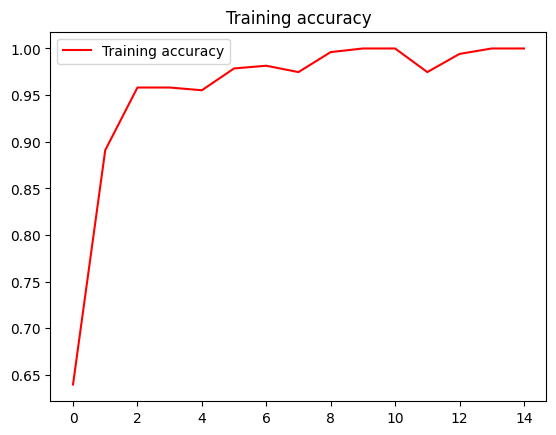

In [13]:
acc = history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.show()